In [1]:
import pandas as pd
import numpy as np

In [202]:
import requests
import html5lib
import re

In [3]:
critters = pd.read_csv('critters_chk_final.csv')

In [4]:
listcritters = critters['sci_name3'].tolist()

In [5]:
add_punc = lambda x: x.replace(' ', '_')
listcritters = list(map(add_punc, listcritters))
listcritters

['Agrias_claudina_sardanapalus',
 'Unknown',
 'Attacus_atlas',
 'Metura_elongatus',
 'Anotogaster_sieboldii',
 'Homoeogryllus_japonica',
 'Eupholus_magnificus',
 'Graptopsaltria_nigrofuscata',
 'Lithobius_forficatus',
 'Unknown',
 'Anoplophora_chinensis',
 'Graphium_sarpedon',
 'Pieris_rapae',
 'Acheta_domesticus',
 'Cyclommatus_elaphus',
 'Ischnura_heterosticta',
 'Anax_parthenope',
 'Dytiscus_marginalis',
 'Pseudotorynorrhina_japonica',
 'Copris_pecuarius',
 'Phelotrupes_auratus',
 'Morpho_menelaus',
 'Tanna_japonensis',
 'Photuris_lucicrescens',
 'Pulex_irritans',
 'Musca_domestica',
 'Quesada_gigas',
 'Dorcus_titanus',
 'Lethocerus_deyrollei',
 'Prosopocoilus_giraffa',
 'Allotopus_rosenbergi',
 'Goliathus_goliatus',
 'Melanoplus_sanguinipes',
 'Sasakia_charonda',
 'Coenobita_cavipes',
 'Apis_mellifera',
 'Chalcosoma',
 'Allomyrina_dichotomus_politus',
 'Megasoma_elephas',
 'Dynastes_hercules',
 'Chrysochroa_fulgidissima',
 'Coccinella_septempunctata',
 'Acrida_cinerea',
 'Chrysirid

In [27]:
#crits2 = listcritters.remove('Unknown')
crits2 = [s for s in listcritters if s != 'Unknown']

In [62]:
crits3 = [s for s in crits2 if s != 'Agrias_claudina_sardanapalus']
crits3

['Attacus_atlas',
 'Metura_elongatus',
 'Anotogaster_sieboldii',
 'Homoeogryllus_japonica',
 'Eupholus_magnificus',
 'Graptopsaltria_nigrofuscata',
 'Lithobius_forficatus',
 'Anoplophora_chinensis',
 'Graphium_sarpedon',
 'Pieris_rapae',
 'Acheta_domesticus',
 'Cyclommatus_elaphus',
 'Ischnura_heterosticta',
 'Anax_parthenope',
 'Dytiscus_marginalis',
 'Pseudotorynorrhina_japonica',
 'Copris_pecuarius',
 'Phelotrupes_auratus',
 'Morpho_menelaus',
 'Tanna_japonensis',
 'Photuris_lucicrescens',
 'Pulex_irritans',
 'Musca_domestica',
 'Quesada_gigas',
 'Dorcus_titanus',
 'Lethocerus_deyrollei',
 'Prosopocoilus_giraffa',
 'Allotopus_rosenbergi',
 'Goliathus_goliatus',
 'Melanoplus_sanguinipes',
 'Sasakia_charonda',
 'Coenobita_cavipes',
 'Apis_mellifera',
 'Chalcosoma',
 'Allomyrina_dichotomus_politus',
 'Megasoma_elephas',
 'Dynastes_hercules',
 'Chrysochroa_fulgidissima',
 'Coccinella_septempunctata',
 'Acrida_cinerea',
 'Chrysiridia_rhipheus',
 'Catacanthus_incarnatus',
 'Hierodula_pate

In [12]:
frog = pd.read_html('https://en.wikipedia.org/wiki/Dryophytes_japonicus')[0]

In [13]:
frog

,Japanese tree frog,Japanese tree frog.1
0,NaN,NaN
1,Conservation status,Conservation status
2,Least Concern (IUCN 3.1)[1],Least Concern (IUCN 3.1)[1]
3,Scientific classification,Scientific classification
4,Kingdom:,Animalia
5,Phylum:,Chordata
6,Class:,Amphibia
7,Order:,Anura
8,Family:,Hylidae
9,Genus:,Dryophytes


In [14]:
frog2 = frog.transpose()

In [15]:
frog2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Japanese tree frog,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,Species:,Binomial name,"Dryophytes japonicus(Günther, 1859)",Synonyms,"Hyla arborea japonica Günther, 1859 Hyla japon..."
Japanese tree frog.1,NaN,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Animalia,Chordata,Amphibia,Anura,Hylidae,Dryophytes,D. japonicus,Binomial name,"Dryophytes japonicus(Günther, 1859)",Synonyms,"Hyla arborea japonica Günther, 1859 Hyla japon..."


In [134]:
red_list3=[]
bad_link3 = [] 
red_list_no_transp = []
for j in crits3:
    base_url_wiki = "https://en.wikipedia.org/wiki/"+str(j)
    response = requests.get(base_url_wiki)
    if response.status_code == 200:
        #continue
        j_red = pd.read_html(base_url_wiki)[0]
        j_red_noT = j_red.copy()
        #red_list_no_transp.append(j_red_noT)
        j_red = j_red.transpose()
        if 'Conservation status' in j_red.values:
            red_list_no_transp.append(j_red_noT)
            j_red['sciname'] = j
            red_list3.append(j_red)
        #elif j_red[2].str.contains('Conservation status').any(): 
        #red_list4.append(j_red)
    else: 
        bad_link3.append(j)
        

In [135]:
red_listdf = pd.concat(red_list3)

In [137]:
red_listdf.shape

(132, 22)

In [138]:
red_listdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,sciname,14,15,16,17,18,19,20
Common bluebottle,NaN,"Resting on a leaf in Uttarakhand, India",Conservation status,Least Concern (IUCN 3.1),Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,Species:,Binomial name,"Graphium sarpedon(Linnaeus, 1758)",Graphium_sarpedon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Common bluebottle.1,NaN,"Resting on a leaf in Uttarakhand, India",Conservation status,Least Concern (IUCN 3.1),Scientific classification,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Graphium,G. sarpedon,Binomial name,"Graphium sarpedon(Linnaeus, 1758)",Graphium_sarpedon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Small white,NaN,Female,NaN,Male,Conservation status,Secure (NatureServe)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,Species:,Pieris_rapae,Binomial name,"Pieris rapae(Linnaeus, 1758)",Synonyms,"Papilio rapae Linnaeus, 1758 Artogeia rapae (L...",NaN,NaN,NaN
Small white.1,NaN,Female,NaN,Male,Conservation status,Secure (NatureServe)[1],Scientific classification,Animalia,Arthropoda,Insecta,Lepidoptera,Pieridae,Pieris,P. rapae,Pieris_rapae,Binomial name,"Pieris rapae(Linnaeus, 1758)",Synonyms,"Papilio rapae Linnaeus, 1758 Artogeia rapae (L...",NaN,NaN,NaN
Ischnura heterosticta,NaN,Male Ischnura heterosticta,NaN,Female Ischnura heterosticta,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Suborder:,Family:,Genus:,Ischnura_heterosticta,Species:,Binomial name,"Ischnura heterosticta(Burmeister, 1842)[2]",NaN,NaN,NaN,NaN
Ischnura heterosticta.1,NaN,Male Ischnura heterosticta,NaN,Female Ischnura heterosticta,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Animalia,Arthropoda,Insecta,Odonata,Zygoptera,Coenagrionidae,Ischnura,Ischnura_heterosticta,I. heterosticta,Binomial name,"Ischnura heterosticta(Burmeister, 1842)[2]",NaN,NaN,NaN,NaN
Lesser emperor,NaN,Male,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Infraorder:,Family:,Genus:,Species:,Binomial name,Anax_parthenope,"Anax parthenope(Sélys, 1839[2])Original genus:...",NaN,NaN,NaN,NaN,NaN,NaN
Lesser emperor.1,NaN,Male,Conservation status,Least Concern (IUCN 3.1)[1],Scientific classification,Animalia,Arthropoda,Insecta,Odonata,Anisoptera,Aeshnidae,Anax,A. parthenope,Binomial name,Anax_parthenope,"Anax parthenope(Sélys, 1839[2])Original genus:...",NaN,NaN,NaN,NaN,NaN,NaN
Western honey beeTemporal range: Oligocene–Recent PreꞒ Ꞓ O S D C P T J K Pg N,NaN,Conservation status,Data Deficient (IUCN 3.1)[1][2],Scientific classification,Kingdom:,Phylum:,Class:,Order:,Family:,Genus:,Species:,Binomial name,"Apis melliferaLinnaeus, 1758",Subspecies[3],Apis_mellifera,"31 currently recognized, see list",Synonyms,"Apis mellifica Linnaeus, 1761 Apis gregaria Ge...",NaN,NaN,NaN,NaN
Western honey beeTemporal range: Oligocene–Recent PreꞒ Ꞓ O S D C P T J K Pg N.1,NaN,Conservation status,Data Deficient (IUCN 3.1)[1][2],Scientific classification,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,A. mellifera,Binomial name,"Apis melliferaLinnaeus, 1758",Subspecies[3],Apis_mellifera,"31 currently recognized, see list",Synonyms,"Apis mellifica Linnaeus, 1761 Apis gregaria Ge...",NaN,NaN,NaN,NaN


In [149]:
indicies = np.where(red_listdf.values=="Conservation status")

In [128]:
#indicies_binom = np.argwhere(red_listdf.values=="Binomial name")

In [150]:
print(type(indicies))

<class 'tuple'>


In [195]:
#indicies.shape

In [161]:
indicies

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 array([2, 2, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4,
        1, 1, 2, 2, 4, 4, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 1,

In [194]:
#list1 = list(indicies)

In [193]:
#list1

In [159]:
#tup2 = tuple(list1)

In [192]:
#tup2

In [155]:
second_element = (indicies[0],indicies[1]+1)

In [156]:
second_element

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 array([3, 3, 5, 5, 5, 5, 3, 3, 2, 2, 2, 2, 3, 3, 5, 5, 3, 3, 3, 3, 5, 5,
        2, 2, 3, 3, 5, 5, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 2,

In [190]:
#zer = np.zeros_like(indicies)

In [191]:
#zer+np.array([0,1])

In [146]:
#indicies_con_ = indicies + (zer+np.array([0,1]))

In [171]:
arrayconserv =red_listdf.values[second_element]
#redlistdfsci = red_listdf['sciname']

In [175]:
red_list_convdf = pd.DataFrame(arrayconserv, columns=['RL_Category'])

In [176]:
red_list_convdf

,RL_Category
0,Least Concern (IUCN 3.1)
1,Least Concern (IUCN 3.1)
2,Secure (NatureServe)[1]
3,Secure (NatureServe)[1]
4,Least Concern (IUCN 3.1)[1]
5,Least Concern (IUCN 3.1)[1]
6,Least Concern (IUCN 3.1)[1]
7,Least Concern (IUCN 3.1)[1]
8,Data Deficient (IUCN 3.1)[1][2]
9,Data Deficient (IUCN 3.1)[1][2]


In [183]:
scinamecol = red_listdf['sciname'].tolist()

In [184]:
scinamecol

['Graphium_sarpedon',
 'Graphium_sarpedon',
 'Pieris_rapae',
 'Pieris_rapae',
 'Ischnura_heterosticta',
 'Ischnura_heterosticta',
 'Anax_parthenope',
 'Anax_parthenope',
 'Apis_mellifera',
 'Apis_mellifera',
 'Megasoma_elephas',
 'Megasoma_elephas',
 'Locusta_migratoria',
 'Locusta_migratoria',
 'Danaus_plexippus',
 'Danaus_plexippus',
 'Ornithoptera_alexandrae',
 'Ornithoptera_alexandrae',
 'Trogonoptera_brookiana',
 'Trogonoptera_brookiana',
 'Sympetrum_fonscolombii',
 'Sympetrum_fonscolombii',
 'Helix_pomatia',
 'Helix_pomatia',
 'Brachypelma_smithi',
 'Brachypelma_smithi',
 'Papilio_glaucus',
 'Papilio_glaucus',
 'Arapaima_gigas',
 'Arapaima_gigas',
 'Betta_splendens',
 'Betta_splendens',
 'Acheilognathus_melanogaster',
 'Acheilognathus_melanogaster',
 'Makaira_nigricans',
 'Makaira_nigricans',
 'Lepomis_macrochirus',
 'Lepomis_macrochirus',
 'Chaetodon_auripes',
 'Chaetodon_auripes',
 'Cyprinus_carpio',
 'Cyprinus_carpio',
 'Silurus_asotus',
 'Silurus_asotus',
 'Oncorhynchus_masou

In [185]:
redlistdfsci = pd.DataFrame(scinamecol,columns=['sci_name'])

In [186]:
redlistdfsci

,sci_name
0,Graphium_sarpedon
1,Graphium_sarpedon
2,Pieris_rapae
3,Pieris_rapae
4,Ischnura_heterosticta
5,Ischnura_heterosticta
6,Anax_parthenope
7,Anax_parthenope
8,Apis_mellifera
9,Apis_mellifera


In [187]:
fin_red_concat = pd.concat([redlistdfsci, red_list_convdf], axis=1)

In [188]:
fin_red_concat

,sci_name,RL_Category
0,Graphium_sarpedon,Least Concern (IUCN 3.1)
1,Graphium_sarpedon,Least Concern (IUCN 3.1)
2,Pieris_rapae,Secure (NatureServe)[1]
3,Pieris_rapae,Secure (NatureServe)[1]
4,Ischnura_heterosticta,Least Concern (IUCN 3.1)[1]
5,Ischnura_heterosticta,Least Concern (IUCN 3.1)[1]
6,Anax_parthenope,Least Concern (IUCN 3.1)[1]
7,Anax_parthenope,Least Concern (IUCN 3.1)[1]
8,Apis_mellifera,Data Deficient (IUCN 3.1)[1][2]
9,Apis_mellifera,Data Deficient (IUCN 3.1)[1][2]


In [199]:
remove_punc = lambda x: x.replace('_', ' ')
fin_red_concat['sci_name3'] = fin_red_concat['sci_name'].apply(lambda x: remove_punc(x))

In [205]:
regex_clean = lambda x: re.sub(r"[\(\[].*?[\)\]]", "", x)
fin_red_concat['Red_List_Category'] = fin_red_concat['RL_Category'].apply(lambda x: regex_clean(x))

In [207]:
fin_red_concat = fin_red_concat.drop_duplicates(subset='sci_name', keep='first')

In [209]:
fin_red_concat.shape

(63, 4)

In [210]:
bad_link3

['Homoeogryllus_japonica',
 'Copris_pecuarius',
 'Phelotrupes_auratus',
 'Photuris_lucicrescens',
 'Allotopus_rosenbergi',
 'Allomyrina_dichotomus_politus',
 'Phyllium_phylliidae',
 'Rhinocerosmuraena_quaesita']

In [83]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [211]:
critters

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name,sci_name2,sci_name3
0,0,0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2,NaN,NaN,NaN,NaN,Agrias_Butterfly,Agrias_Butterfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Agrias claudina sardanapalus</a>,Agrias claudina sardanapalus
1,1,1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv,NaN,NaN,NaN,NaN,Ant,Ant,['Unknown'],Unknown,Unknown,Unknown
2,2,2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,NaN,NaN,NaN,NaN,NaN,NaN,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8,NaN,NaN,NaN,NaN,Atlas_Moth,Atlas_Moth,['Attacus atlas'],Attacus atlas,Attacus atlas,Attacus atlas
3,3,3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4,NaN,NaN,NaN,NaN,Bagworm,Bagworm,['Metura elongatus'],Metura elongatus,Metura elongatus,Metura elongatus
4,4,4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7,NaN,NaN,NaN,NaN,Banded_Dragonfly,Banded_Dragonfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Anotogaster sieboldii</a>,Anotogaster sieboldii
5,5,5,21,bell cricket,430,On the ground,Any except rain,0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 PM – 8 AM,5 PM – 8 AM,NaN,NaN,NaN,NaN,5 PM – 8 AM,5 PM – 8 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE,NaN,NaN,NaN,NaN,Bell_Cricket,Bell_Cricket,['Homoeogryllus japonica'],Homoeogryllus japonica,Homoeogryllus japonica,Homoeogryllus japonica
6,6,6,49,blue weevil beetle,800,On palm trees,Any weather,0,2,NaN,NaN,NaN,NaN,NaN,NaN,All day,All day,NaN,NaN,NaN,NaN,All day,All day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green,Pink,Ins80,InsectHousekizoumushi,FtrInsectHousekizoumushi,3485,qocWy6r5RXjeThdYy,NaN,NaN,NaN,NaN,Blue_Weevil_Beetle,Blue_Weevil_Beetle,['Eupholus magnificus'],Eupholus magnificus,Eupholus magnificus,Eupholus magnificus
7,7,7,26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,NaN,NaN,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,8 AM – 5 PM,8 AM – 5 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brown,Green,Ins17,InsectAburazemi,FtrInsectAburazemi,582,gBLRZ2J2R2wwYWFCk,NaN,NaN,NaN,NaN,Brown_Cicada,Brown_Cicada,['Graptopsaltria nigrofuscata'],Graptopsaltria nigrofuscata,Graptopsaltria nigro

In [212]:
critters_w_rl_cat = critters.merge(fin_red_concat,on='sci_name3',how='left')

In [222]:
#Filling every critter with no conservation status listed on their respective wikipedia
#pages by scientific name.  Perhaps the IUCN API would have served better to get more critter
#red list categories filled in, but no way to tell.

In [223]:
critters_w_rl_cat['Red_List_Category'] = critters_w_rl_cat['Red_List_Category'].fillna('Least Concern')

In [244]:
#removing extra whitespace from df

In [245]:
critters_w_rl_cat = critters_w_rl_cat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [246]:
#Now that we have our final dataframe we can start cleaning it up a bit. Going to fillna
#for all the columns with "".

In [247]:
critters_w_rl_cat = critters_w_rl_cat.fillna('')

In [248]:
critters_w_rl_cat

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category
0,0,0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2,,,,,Agrias_Butterfly,Agrias_Butterfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Agrias claudina sardanapalus</a>,Agrias claudina sardanapalus,,,Least Concern
1,1,1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv,,,,,Ant,Ant,['Unknown'],Unknown,Unknown,Unknown,,,Least Concern
2,2,2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,,,,,,,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8,,,,,Atlas_Moth,Atlas_Moth,['Attacus atlas'],Attacus atlas,Attacus atlas,Attacus atlas,,,Least Concern
3,3,3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4,,,,,Bagworm,Bagworm,['Metura elongatus'],Metura elongatus,Metura elongatus,Metura elongatus,,,Least Concern
4,4,4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,,,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,,,,,,,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7,,,,,Banded_Dragonfly,Banded_Dragonfly,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Anotogaster sieboldii</a>,Anotogaster sieboldii,,,Least Concern
5,5,5,21,bell cricket,430,On the ground,Any except rain,0,60,,,,,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,5 PM – 8 AM,5 PM – 8 AM,,,,,,,,,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE,,,,,Bell_Cricket,Bell_Cricket,['Homoeogryllus japonica'],Homoeogryllus japonica,Homoeogryllus japonica,Homoeogryllus japonica,,,Least Concern
6,6,6,49,blue weevil beetle,800,On palm trees,Any weather,0,2,,,,,,,All day,All day,,,,,All day,All day,,,,,,,,,,,Green,Pink,Ins80,InsectHousekizoumushi,FtrInsectHousekizoumushi,3485,qocWy6r5RXjeThdYy,,,,,Blue_Weevil_Beetle,Blue_Weevil_Beetle,['Eupholus magnificus'],Eupholus magnificus,Eupholus magnificus,Eupholus magnificus,,,Least Concern
7,7,7,26,brown cicada,250,On hardwood/cedar trees,Any weather,0,70,,,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,8 AM – 5 PM,8 AM – 5 PM,,,,,,,,,,,Brown,Green,Ins17,InsectAburazemi,FtrInsectAburazemi,582,gBLRZ2J2R2wwYWFCk,,,,,Brown_Cicada,Brown_Cicada,['Graptopsaltria nigrofuscata'],Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,Graptopsaltria nigrofuscata,,,Least Concern
8,8,8,77,centipede,300,From hitting rocks,Any weather,0,30,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM,,,4 PM – 11 PM,4 PM – 11 PM,4 PM – 11 PM

In [289]:
critters_describe = critters_w_rl_cat.groupby(['Red_List_Category'])['Sell'].describe().reset_index()

In [290]:
critters_describe = critters_describe.round(0)

In [291]:
critters_describe = critters_describe.sort_values('mean',ascending = False)

In [292]:
critters_describe = critters_describe.rename(columns={"mean": "Mean Sell Price",
                                            "count":"Count per Category"
                                                     })

In [293]:
critters_describe = critters_describe.fillna(0)

In [294]:
critters_describe

,Red_List_Category,Count per Category,Mean Sell Price,std,min,25%,50%,75%,max
1,Critically Imperiled,1.0,15000.0,0.0,15000.0,15000.0,15000.0,15000.0,15000.0
0,Critically Endangered,3.0,12667.0,4041.0,8000.0,11500.0,15000.0,15000.0,15000.0
3,Endangered,4.0,7000.0,5477.0,1000.0,3250.0,7000.0,10750.0,13000.0
8,Vulnerable,6.0,5450.0,5830.0,300.0,1300.0,3250.0,8500.0,15000.0
5,Near Threatened,6.0,4715.0,4211.0,140.0,862.0,5000.0,7750.0,10000.0
2,Data Deficient,4.0,3050.0,4649.0,200.0,725.0,1000.0,3325.0,10000.0
6,Not evaluated,1.0,2500.0,0.0,2500.0,2500.0,2500.0,2500.0,2500.0
4,Least Concern,133.0,2407.0,3335.0,10.0,300.0,800.0,3000.0,15000.0
7,Secure,2.0,200.0,57.0,160.0,180.0,200.0,220.0,240.0


In [301]:
orderbox = critters_describe['Red_List_Category'].tolist()

In [386]:
import seaborn as sns

In [387]:
sns.set(rc={'figure.figsize':(14,12)})
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Distributin of Critters in ACNH by IUCN Red List Category and Sell Price')

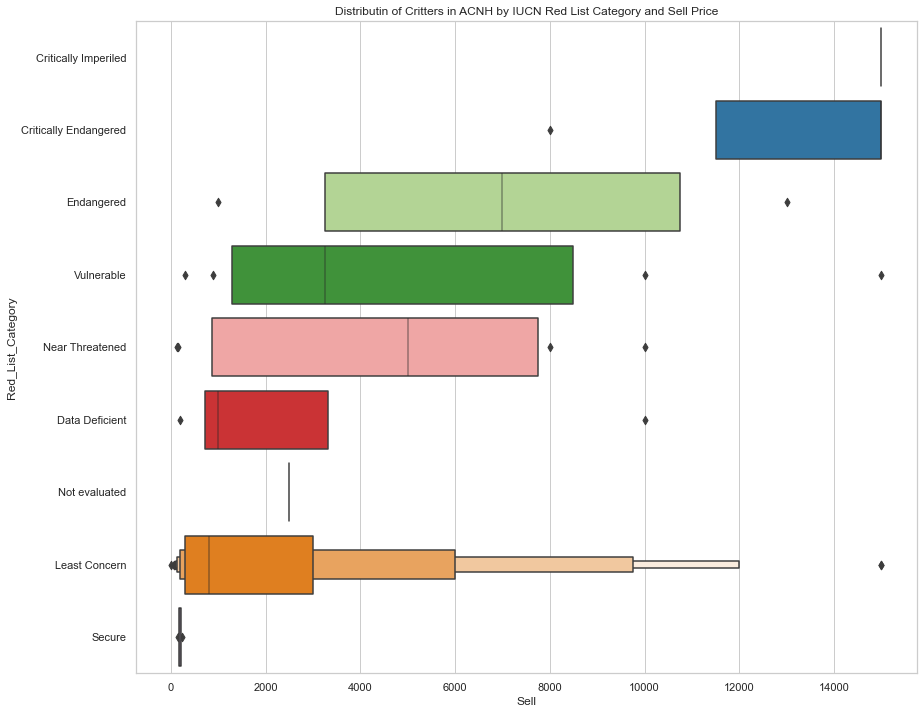

In [388]:
ax = sns.boxenplot(x="Sell", y="Red_List_Category", data=critters_w_rl_cat, orient="h", 
                 order = orderbox, palette ="Paired")
plt.title("Distributin of Critters in ACNH by IUCN Red List Category and Sell Price")
#ax = sns.swarmplot(x="Red_List_Category", y="Sell", data=critters_w_rl_cat, color=".25")

Text(0.5, 1.0, 'Distributin of Critters in ACNH by IUCN Red List Category and Sell Price')

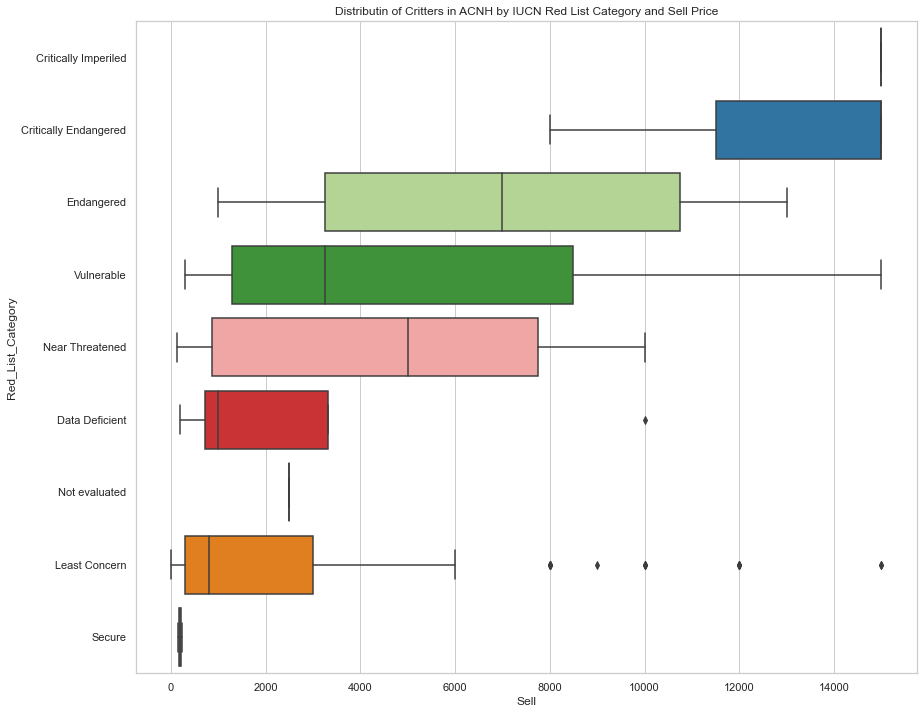

In [389]:
ax3 = sns.boxplot(x="Sell", y="Red_List_Category", data=critters_w_rl_cat, orient="h", 
                 order = orderbox, palette ="Paired")
plt.title("Distributin of Critters in ACNH by IUCN Red List Category and Sell Price")

Text(0.5, 1.0, 'Critters in ACNH by IUCN Red List Category and Sell Price')

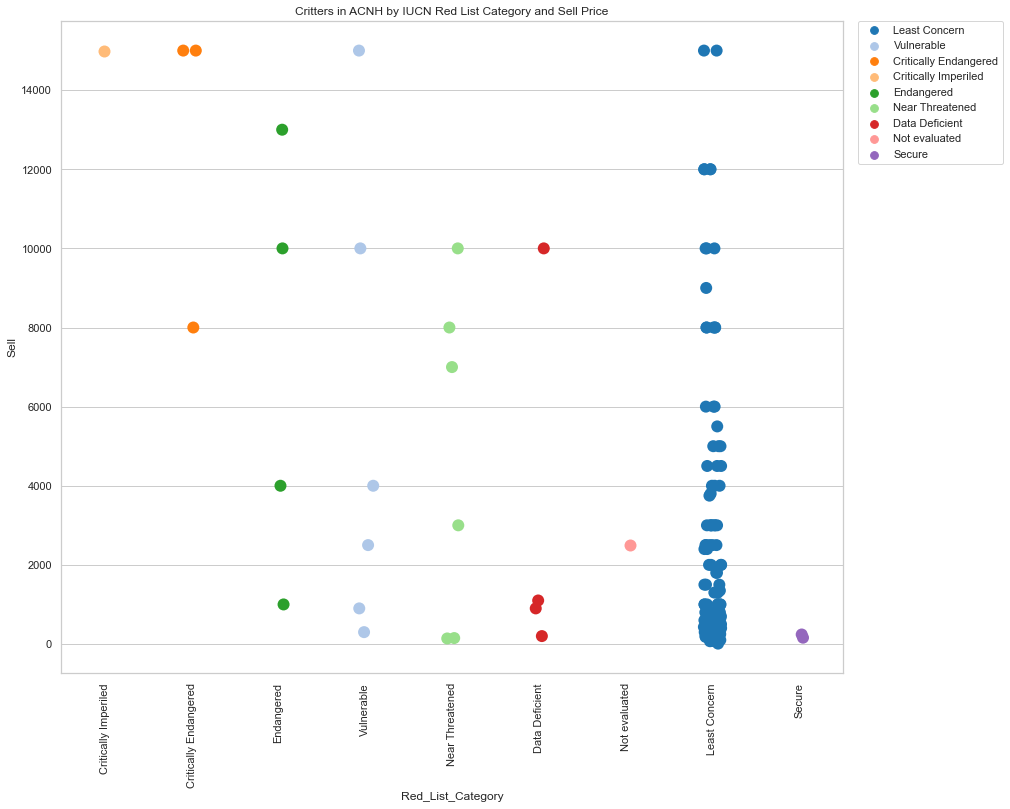

In [396]:
ax2 = sns.stripplot(x="Red_List_Category", y="Sell", data=critters_w_rl_cat, hue="Red_List_Category",
                   order = orderbox, palette = 'tab20',size=12)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Critters in ACNH by IUCN Red List Category and Sell Price")

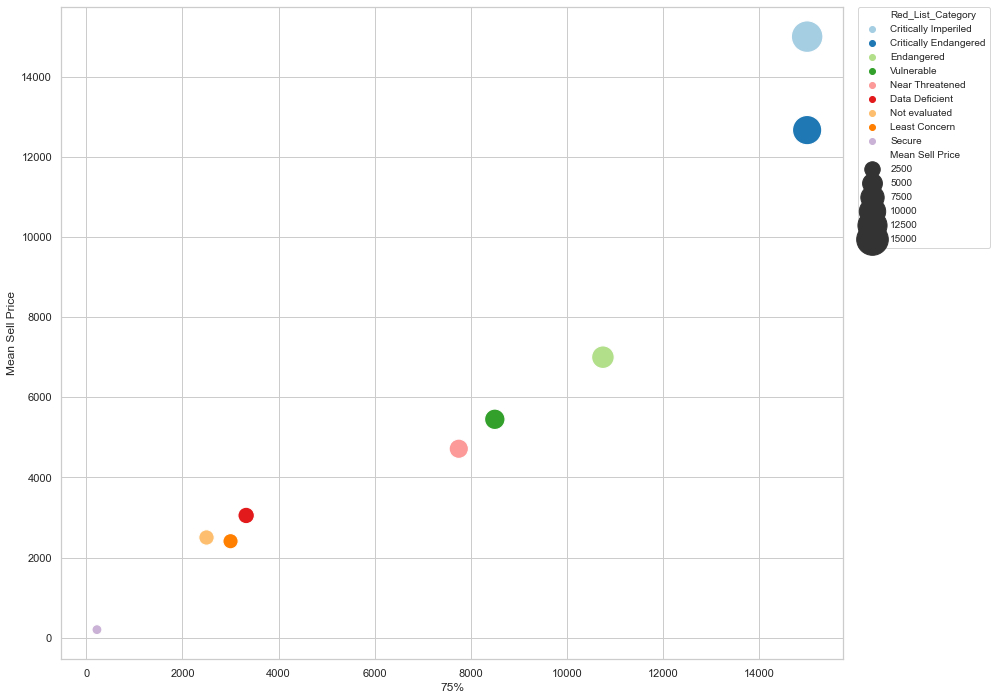

In [391]:
ax3 = sns.scatterplot(
    data=critters_describe, x="75%", y="Mean Sell Price", hue='Red_List_Category', size="Mean Sell Price",
    sizes=(100, 1000),legend="brief",palette = 'Paired'
)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')

In [376]:
critters_w_rl_cat = critters_w_rl_cat.sort_values('Sell',ascending = False)

In [377]:
top20sell = critters_w_rl_cat[0:30]

In [378]:
top20sell

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category
85,85,85,79,barreleye,15000,Sea,,100,1,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,Black,Black,Fish84,FishDemenigisu,FtrFishDemenigisu,4204,BpqTa4zmTjv3Nm4wE,Small,No,1x1,Fluorescent,Barreleye,Barreleye,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Macropinna microstoma</a>,Macropinna microstoma,,,Least Concern
112,112,112,74,great white shark,15000,Sea,,50,2,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,Blue,Blue,Fish62,FishSame,FtrFishSame,2280,EPypAeJGuTDGFJRnx,Large w/Fin,Yes,3x2,No lighting,Great_White_Shark,Great_White_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Carcharodon carcharias</a>,Carcharodon carcharias,Carcharodon_carcharias,Vulnerable (IUCN 3.1)[1],Vulnerable
98,98,98,80,coelacanth,15000,Sea (rainy days),,100,1–2,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,Black,Fish63,FishSirakansu,FtrFishSirakansu,2284,NjMZQ6Xi9NswEXnHH,XX-Large,Yes,2x1,Fluorescent,Coelacanth,Coelacanth,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Latimeria chalumnae</a>,Latimeria chalumnae,Latimeria_chalumnae,Critically Endangered (IUCN 2.3)[2],Critically Endangered
103,103,103,42,dorado,15000,River,,100,1–2,,,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,,,,,,4 AM – 9 PM,Yellow,Black,Fish34,FishDolado,FtrFishDolado,2251,G7ZwD67cRMHBwTSKH,X-Large,No,2x1,Fluorescent,Dorado,Dorado,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Salminus brasiliensis</a>,Salminus brasiliensis,,,Least Concern
110,110,110,29,golden trout,15000,River (clifftop),,100,1,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,Brown,Black,Fish79,FishGoldenTorauto,FtrFishGoldenTorauto,4193,wwGzR7FzWNJ7cDz9X,Medium,No,1x1,Fluorescent,Golden_Trout,Golden_Trout,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Oncorhynchus aguabonita</a>,Oncorhynchus aguabonita,Oncorhynchus_aguabonita,Critically Imperiled (NatureServe),Critically Imperiled
149,149,149,30,stringfish,15000,River (clifftop),,100,1,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,Brown,Black,Fish26,FishItou,FtrFishItou,2241,APXg8kSzjcmoGGWSP,X-Large,No,2x1,Fluorescent,Stringfish,Stringfish,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Parahucho perryi</a>,Parahucho perryi,Parahucho_perryi,Critically Endangered (IUCN 3.1)[1],Critically Endangered
157,157,157,75,whale shark,13000,Sea,,50,1,,,,,,All day,All day,All day,All day,,,,All day,All day,All day,,,,,,,,,All day,Black,Blue,Fish72,FishJinbeezame,FtrFishJinbee,2282,r3RAtJsXENwnFvQh7,Large w/Fin,Yes,3x2,No lighting,Whale_Shar

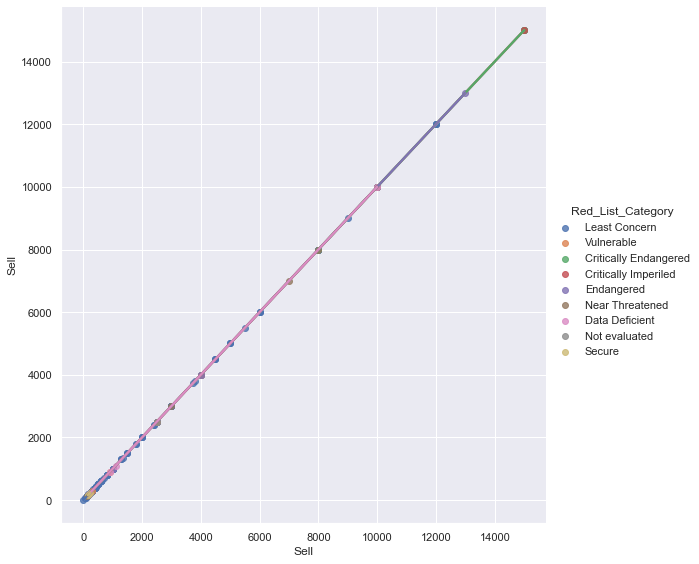

In [380]:
g = sns.lmplot(x="Sell", y="Sell", hue="Red_List_Category", height=8,data=critters_w_rl_cat)
sns.set(rc={'figure.figsize':(18,12)})

In [399]:
localsofcritters = critters_w_rl_cat['Where/How'].tolist()

In [402]:
localsofcritters = np.unique(localsofcritters)

In [406]:
localsofcritters

array(['Disguised on shoreline', 'Disguised under trees', 'Flying',
       'Flying near blue/purple/black flowers', 'Flying near flowers',
       'Flying near light sources',
       'Flying near trash (boots, tires, cans) or rotten turnips',
       'Flying near water', 'From hitting rocks', 'On beach rocks',
       'On flowers', 'On hardwood/cedar trees', 'On palm trees',
       'On rivers/ponds', 'On rocks/bushes', 'On rotten turnips',
       'On the ground', 'On tree stumps', 'On trees (any kind)',
       'On villagers', 'On white flowers', 'Pier', 'Pond',
       'Pushing snowballs', 'River', 'River (clifftop)', 'River (mouth)',
       'Sea', 'Sea (rainy days)', 'Shaking trees',
       'Shaking trees (hardwood or cedar only)',
       'Underground (dig where noise is loudest)'], dtype='<U56')

In [427]:
options = {'On trees (any kind)':'Found on/in Trees', 'On tree stumps' :'Found on/in Trees',
           'On hardwood/cedar trees':'Found on/in Trees','On palm trees':'Found on/in Trees',
           'Shaking trees (hardwood or cedar only)':'Found on/in Trees','Shaking trees':'Found on/in Trees',
           'River':'Found on/in Rivers or Pond','River (clifftop)':'Found on/in Rivers or Pond',
           'River (mouth)' :'Found on/in Rivers or Pond','Pond':'Found on/in Rivers or Pond',
           'On rivers/ponds':'Found on/in Rivers or Pond','Pond':'Found on/in Rivers or Pond',
           'Flying near light sources':'Flying','Flying':'Flying',
           'Flying near blue/purple/black flowers':'Flying','Flying near flowers':'Flying',
           'Flying near water':'Flying','Flying near trash (boots, tires, cans) or rotten turnips':'Flying',
           'On beach rocks':'Found on something','On flowers':'Found on something',
           'On rocks/bushes':'Found on something','On rotten turnips' :'Found on something',
           'On the ground' :'Found on something', 'On villagers' :'Found on something',
           'On white flowers' :'Found on something','Pushing snowballs':'Found on something',
           'Disguised on shoreline':'Disguised','Disguised under trees':'Disguised',
           'Underground (dig where noise is loudest)':'Underground',
           'Sea':'Ocean Sea', 'Sea (rainy days)':'Ocean Sea', 'Pier':'Ocean Sea',
           'From hitting rocks':'Found on something'}
           


In [428]:
critters_w_rl_cat['Where Found'] = critters_w_rl_cat['Where/How'].apply (lambda x: options.get(x,"Not Found"))

In [429]:
critters_w_rl_cat

,Unnamed: 0,Unnamed: 0.1,#,Name_x,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID,Shadow,Rain/Snow Catch Up,Size,Lighting Type,Name2,Name_y,title,sci_name_x,sci_name2,sci_name3,sci_name_y,RL_Category,Red_List_Category,Where Found
85,85,85,79,barreleye,15000,Sea,,100,1,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,9 PM – 4 AM,Black,Black,Fish84,FishDemenigisu,FtrFishDemenigisu,4204,BpqTa4zmTjv3Nm4wE,Small,No,1x1,Fluorescent,Barreleye,Barreleye,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Macropinna microstoma</a>,Macropinna microstoma,,,Least Concern,Ocean Sea
112,112,112,74,great white shark,15000,Sea,,50,2,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,Blue,Blue,Fish62,FishSame,FtrFishSame,2280,EPypAeJGuTDGFJRnx,Large w/Fin,Yes,3x2,No lighting,Great_White_Shark,Great_White_Shark,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Carcharodon carcharias</a>,Carcharodon carcharias,Carcharodon_carcharias,Vulnerable (IUCN 3.1)[1],Vulnerable,Ocean Sea
98,98,98,80,coelacanth,15000,Sea (rainy days),,100,1–2,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,All day,Black,Black,Fish63,FishSirakansu,FtrFishSirakansu,2284,NjMZQ6Xi9NswEXnHH,XX-Large,Yes,2x1,Fluorescent,Coelacanth,Coelacanth,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Latimeria chalumnae</a>,Latimeria chalumnae,Latimeria_chalumnae,Critically Endangered (IUCN 2.3)[2],Critically Endangered,Ocean Sea
103,103,103,42,dorado,15000,River,,100,1–2,,,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,,,,,,,,,4 AM – 9 PM,Yellow,Black,Fish34,FishDolado,FtrFishDolado,2251,G7ZwD67cRMHBwTSKH,X-Large,No,2x1,Fluorescent,Dorado,Dorado,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Salminus brasiliensis</a>,Salminus brasiliensis,,,Least Concern,Found on/in Rivers or Pond
110,110,110,29,golden trout,15000,River (clifftop),,100,1,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,Brown,Black,Fish79,FishGoldenTorauto,FtrFishGoldenTorauto,4193,wwGzR7FzWNJ7cDz9X,Medium,No,1x1,Fluorescent,Golden_Trout,Golden_Trout,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Oncorhynchus aguabonita</a>,Oncorhynchus aguabonita,Oncorhynchus_aguabonita,Critically Imperiled (NatureServe),Critically Imperiled,Found on/in Rivers or Pond
149,149,149,30,stringfish,15000,River (clifftop),,100,1,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,,,,,,4 PM – 9 AM,,,,,,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,,,,Brown,Black,Fish26,FishItou,FtrFishItou,2241,APXg8kSzjcmoGGWSP,X-Large,No,2x1,Fluorescent,Stringfish,Stringfish,"[<a class=""extiw"" href=""https://en.wikipedia.o...","<a class=""extiw"" href=""https://en.wikipedia.or...",>Parahucho perryi</a>,Parahucho perryi,Parahucho_perryi,Critically Endangered (IUCN 3.1)[1],Critically Endangered,Found on/in Rivers or Pond
157,157,157,75,whale shark,13000,Sea,,50,1,,,,,,All day,All day,All day,All day,,,,All day,All day,All day,,,,,,

In [434]:
local_c_cat =critters_w_rl_cat.groupby(by=['Where Found','Red_List_Category'])['Sell'].describe().reset_index()

In [435]:
local_c_cat

,Where Found,Red_List_Category,count,mean,std,min,25%,50%,75%,max
0,Disguised,Least Concern,2.0,800.000000,282.842712,600.0,700.0,800.0,900.0,1000.0
1,Flying,Data Deficient,1.0,200.000000,NaN,200.0,200.0,200.0,200.0,200.0
2,Flying,Endangered,1.0,4000.000000,NaN,4000.0,4000.0,4000.0,4000.0,4000.0
3,Flying,Least Concern,17.0,1470.000000,1537.916610,60.0,180.0,500.0,2500.0,4500.0
4,Flying,Near Threatened,1.0,140.000000,NaN,140.0,140.0,140.0,140.0,140.0
5,Flying,Secure,2.0,200.000000,56.568542,160.0,180.0,200.0,220.0,240.0
6,Found on something,Least Concern,21.0,953.333333,1793.143422,70.0,200.0,300.0,600.0,8000.0
7,Found on something,Near Threatened,1.0,8000.000000,NaN,8000.0,8000.0,8000.0,8000.0,8000.0
8,Found on/in Rivers or Pond,Critically Endangered,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
9,Found on/in Rivers or Pond,Critically Imperiled,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0


Text(0.5, 1.0, 'Critters by catch locations and IUCN Red List Category Type and Sell Price')

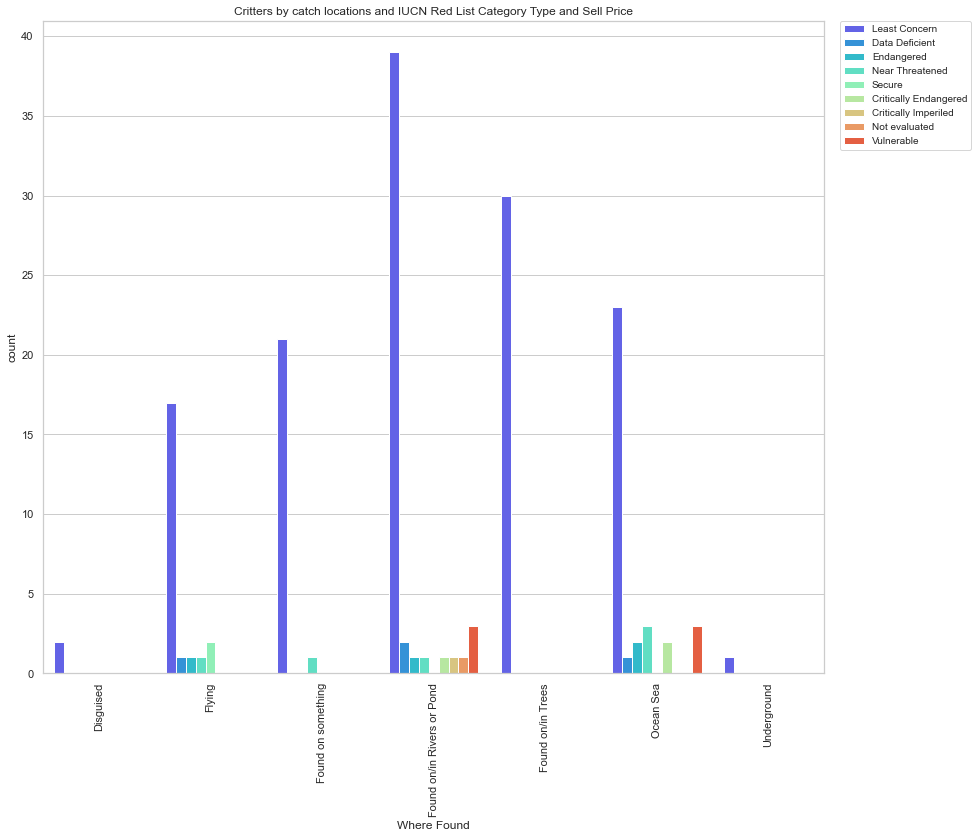

In [441]:
l = sns.barplot(x='Where Found',y='count',data=local_c_cat, 
                palette='rainbow', hue='Red_List_Category',ci=None)
l.set_xticklabels(l.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='10')
plt.title("Critters by catch locations and IUCN Red List Category Type and Sell Price")